In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 828 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
sp500data = yf.download("^GSPC", start="2017-01-01", end="2022-12-1")


[*********************100%***********************]  1 of 1 completed


In [ ]:
sp500_df = pd.DataFrame(sp500data)
sp500_df.to_csv("sp500_data.csv")

In [ ]:
sp500_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000
...,...,...,...,...,...,...
2022-11-23,4000.300049,4033.780029,3998.659912,4027.260010,4027.260010,3279720000
2022-11-25,4023.340088,4034.020020,4020.760010,4026.120117,4026.120117,1706460000
2022-11-28,4005.360107,4012.270020,3955.770020,3963.939941,3963.939941,3615430000


In [ ]:
sp500_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

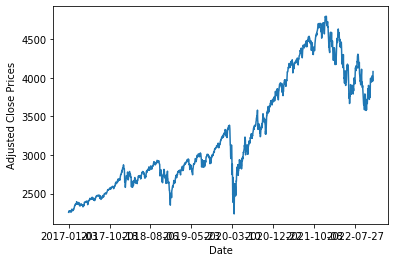

In [ ]:
read_df = pd.read_csv("sp500_data.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [ ]:
df = pd.read_csv("sp500_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [ ]:
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
model = DecisionTreeRegressor(random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[2270.43994141 2724.6550293  4158.24023438 2690.01000977 3273.39990234
 2656.42342122 4300.16992188 4397.93994141 2900.51000977 2496.65991211
 3380.20003255 4158.24023438 2885.7199707  3276.23999023 3066.59008789
 2863.3499349  4410.12988281 4290.60986328 2388.67202148 2636.88000488
 3841.4699707  2614.44995117 3283.14990234 2730.19995117 2550.78491211
 3283.14990234 2789.44335938 2907.95996094 2575.26000977 2979.24324544
 2802.81005859 4392.13989258 3537.01000977 3273.39990234 3289.29003906
 2919.39990234 3373.93994141 4441.66992188 2913.94002279 2887.40999349
 4026.12011719 3383.54003906 2783.02001953 4079.94995117 2351.13000488
 2879.09659831 2500.22998047 2737.76000977 3120.45996094 2879.09659831
 2724.6550293  3749.62988281 4101.22998047 4486.3449707  2280.20007324
 3185.04003906 2867.23999023 4696.85660807 4290.60986328 2880.34008789
 2837.14001465 2748.24666341 2752.12670898 3856.01501465 2896.73999023
 2775.61499023 3821.45007324 3577.59008789 3397.15991211 2905.19669596
 2440.

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Decision Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.2396
Mean Squared Error: 13.4319
Root Mean Squared Error: 3.665
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Decision Tree Regressor.
Accuracy: 99.93 %.


In [ ]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

Buy price and date
            Predictions
Unnamed: 0             
2022-11-30  2270.439941
2023-02-26  2270.439941
2023-04-12  2270.439941
2023-05-14  2270.439941
2023-06-10  2270.439941
Sell price and date
            Predictions
Unnamed: 0             
2023-05-21  4726.350098


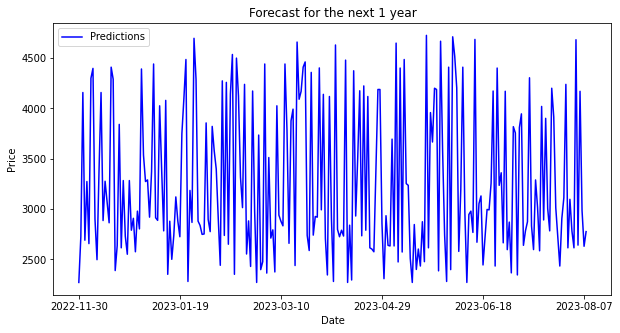

In [ ]:
oneyear_df_pred = pd.read_csv("/content/one-year-predictions.csv")
oneyear_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
            Predictions
Unnamed: 0             
2022-11-30  2270.439941
Sell price and date
            Predictions
Unnamed: 0             
2022-12-16  4410.129883


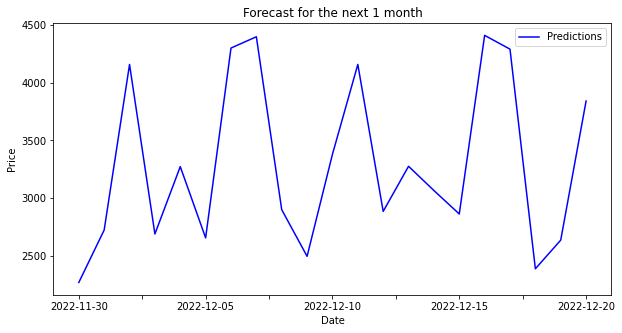

In [ ]:
oneyear_df_pred = pd.read_csv("/content/one-month-predictions.csv")
oneyear_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
            Predictions
Unnamed: 0             
2022-11-30  2270.439941
Sell price and date
            Predictions
Unnamed: 0             
2022-12-02  4158.240234


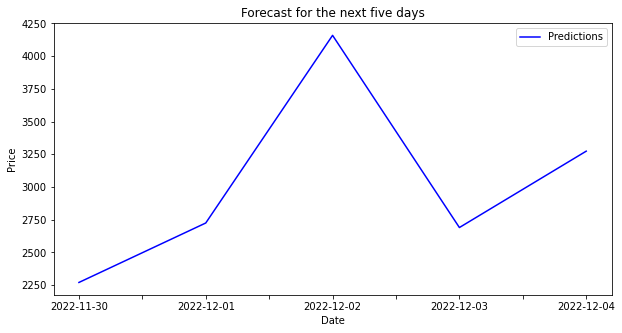

In [ ]:
oneyear_df_pred = pd.read_csv("/content/five-days-predictions.csv")
oneyear_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next five days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_3 <= 0.26
|   |--- feature_3 <= -0.63
|   |   |--- feature_4 <= -0.99
|   |   |   |--- feature_4 <= -1.21
|   |   |   |   |--- feature_4 <= -1.34
|   |   |   |   |   |--- feature_2 <= -1.38
|   |   |   |   |   |   |--- feature_2 <= -1.46
|   |   |   |   |   |   |   |--- value: [2237.40]
|   |   |   |   |   |   |--- feature_2 >  -1.46
|   |   |   |   |   |   |   |--- feature_4 <= -1.41
|   |   |   |   |   |   |   |   |--- feature_4 <= -1.42
|   |   |   |   |   |   |   |   |   |--- value: [2257.83]
|   |   |   |   |   |   |   |   |--- feature_4 >  -1.42
|   |   |   |   |   |   |   |   |   |--- feature_2 <= -1.41
|   |   |   |   |   |   |   |   |   |   |--- value: [2265.20]
|   |   |   |   |   |   |   |   |   |--- feature_2 >  -1.41
|   |   |   |   |   |   |   |   |   |   |--- value: [2263.69]
|   |   |   |   |   |   |   |--- feature_4 >  -1.41
|   |   |   |   |   |   |   |   |--- feature_3 <= -1.40
|   |   |   |   |   |   |   |   |   |--- feature_3 <= -1.41
|   |   |   |   |

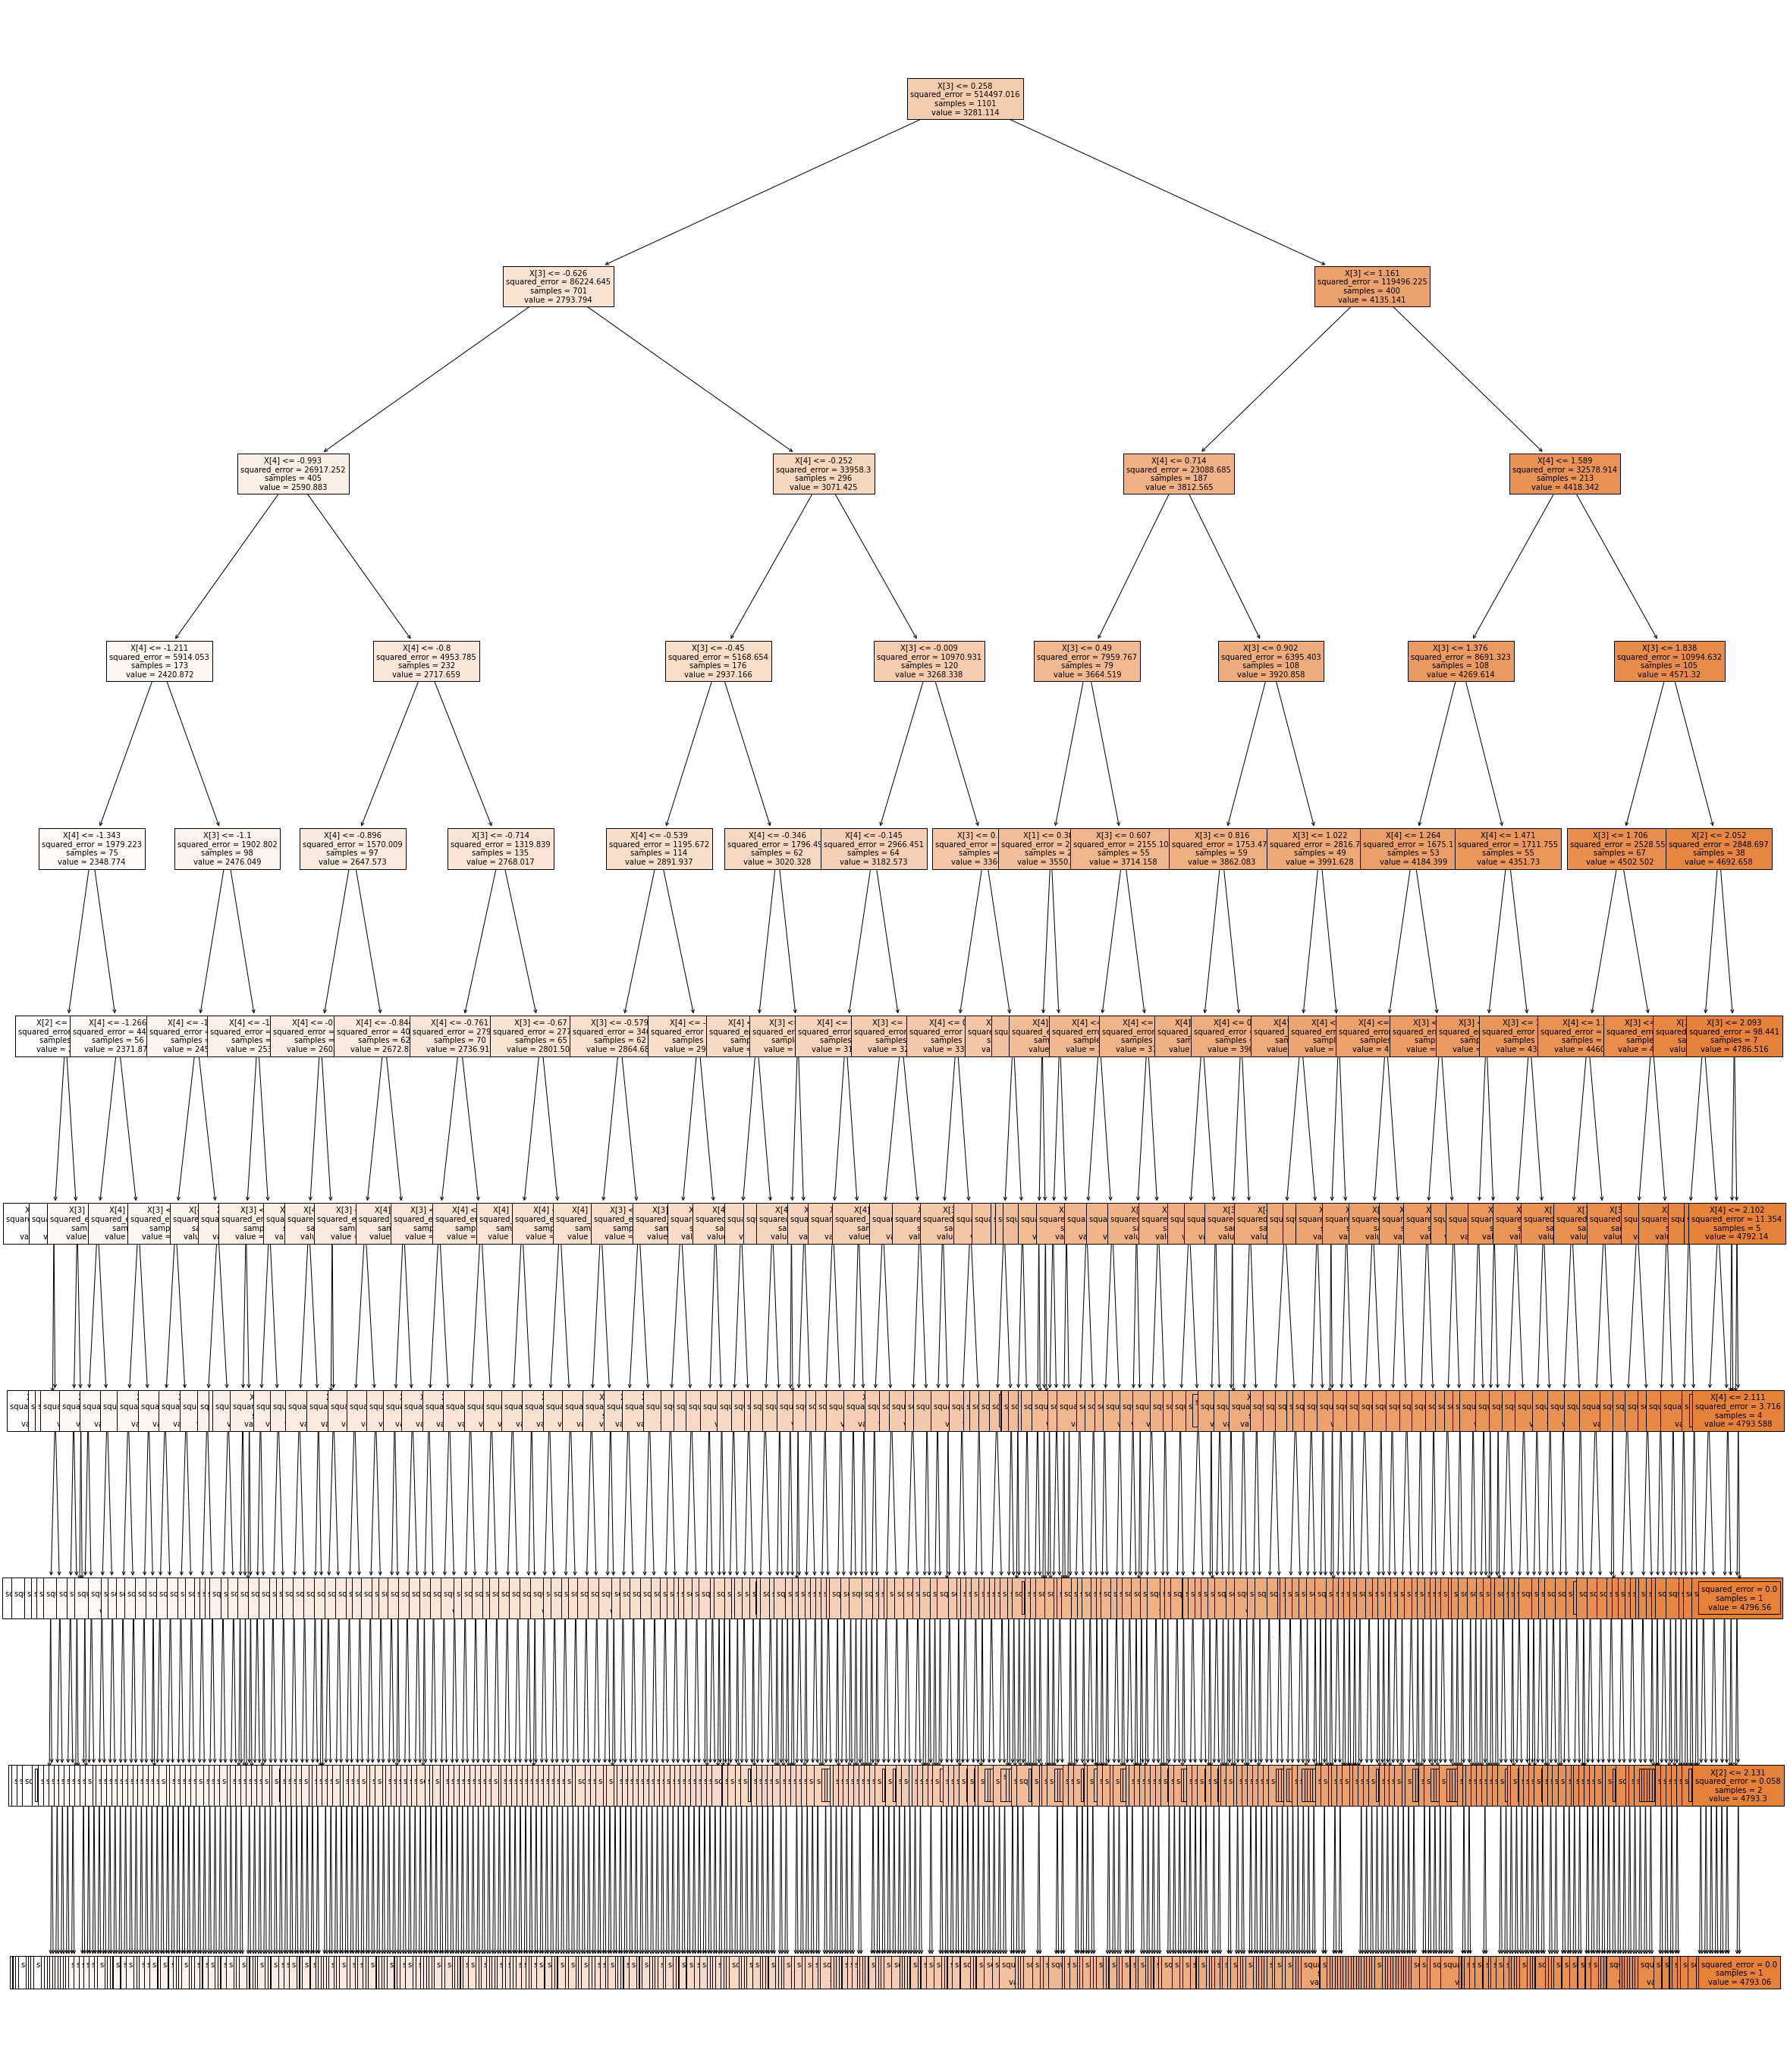

In [ ]:
fig = plt.figure(figsize=(40,50))
_ = tree.plot_tree(model, filled=True,fontsize=10)